In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse 

In [3]:
def design_mat_pol(x, p):
    n = len(x)
    phi_mat = np.ones((n, 1))
    for i in range(1, p + 1):
        phi_i = (x ** i).reshape((-1, 1))
        phi_mat = np.hstack((phi_mat, phi_i))
    return phi_mat
# functions to return polynomial phi matrix

In [4]:
df=pd.read_csv('/Users/yiqiuxia/Downloads/dataset 2/dataset-a.csv')
x=df['x'].values
y=df['y'].values


In [5]:
x_tv, x_test, y_tv, y_test = train_test_split(
    x, y, test_size=1/4, random_state=1)
x_train, x_vali, y_train, y_vali = train_test_split(
    x_tv, y_tv, test_size=1/3, random_state=1)

In [6]:
df=pd.read_csv('/Users/yiqiuxia/Downloads/dataset 2/dataset-b.csv')
x1=df['x'].values
y1=df['y'].values

In [30]:
x1_tv, x1_test, y1_tv, y1_test = train_test_split(
    x1, y1, test_size=1/4, random_state=1)
x1_train, x1_vali, y1_train, y1_vali = train_test_split(
    x1_tv, y1_tv, test_size=1/3, random_state=1)

In [7]:
df=pd.read_csv('/Users/yiqiuxia/Downloads/dataset 2/dataset-c.csv')
x2=df['x'].values
y2=df['y'].values

In [46]:
x2_tv, x2_test, y2_tv, y2_test = train_test_split(
    x2, y2, test_size=1/4, random_state=1)
x2_train, x2_vali, y2_train, y2_vali = train_test_split(
    x2_tv, y2_tv, test_size=1/3, random_state=1)

In [8]:
df=pd.read_csv('/Users/yiqiuxia/Downloads/dataset 2/dataset-d.csv')
x3=df['x'].values
y3=df['y'].values

In [52]:
x3_tv, x3_test, y3_tv, y3_test = train_test_split(
    x3, y3, test_size=1/4, random_state=1)
x3_train, x3_vali, y3_train, y3_vali = train_test_split(
    x3_tv, y3_tv, test_size=1/3, random_state=1)

In [91]:
table={'data':['data_a','data_b', 'data_c', 'data_d']}
table=pd.DataFrame(table)
print(table)
#generate table for hypreparameters

     data
0  data_a
1  data_b
2  data_c
3  data_d


In [9]:
def design_mat_rad(x, p, s):
    n = len(x)
    phi_mat = np.ones((n, 1))
    for i in range(1, p + 1):
        phi_i = np.exp(-(x - i / (p + 1)) ** 2 / (2 * s ** 2))
        phi_mat = np.hstack((phi_mat, phi_i.reshape((-1, 1))))
    return phi_mat
# functions to return radical phi matrix

In [13]:
def skl_predict_new(phi_mat, y, phi_mat_new):
    lr = LinearRegression()
    lr.fit(phi_mat, y)
    y_hat = lr.predict(phi_mat_new)
    return y_hat
#functions for linear regression predictions

# polynomial dataset_a 


In [63]:
max_deg=10
degrees=range(1, max_deg+1)
i=[]
for p in degrees:
    
    pred_vali = skl_predict_new(design_mat_pol(x_train, p), y_train,design_mat_pol(x_vali, p))
    mse_vali=mse(pred_vali, y_vali)
    #calculate mse with the prediction y and real y
    i.append(mse_vali)
    min_i=np.argmin(i)
    #return the index for the min mse in i
print(min_i)
print(i)
    



        

        

        
        
       
       




1
[0.11399859419252725, 0.05013733863285985, 0.05017782601496683, 0.05016576579659693, 0.05016759634330999, 0.050282810236678264, 0.05037257946163834, 0.05041437232592963, 0.05040582055686652, 0.05041676774453524]


In [171]:
poly=[]
poly.append(min_i)
print(poly)
# save the hypreparameter to the poly

[1]


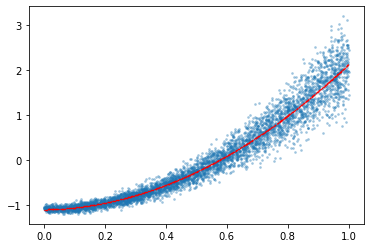

<Figure size 432x288 with 0 Axes>

In [197]:
plt.scatter(x, y, s=3, alpha=0.3)#scatter plot for x,y

y_hat_1 = skl_predict_new(design_mat_pol(x_train, 2), y_train,design_mat_pol(x_vali, 2))
plt.plot(x_vali, y_hat_1, 'r.', markersize=0.5)
#line plot for x_vali and predicted y
plt.show()
plt.savefig('poly_a.jpg')


In [126]:
poly_test=[]
pred_test = skl_predict_new(design_mat_pol(x_train, 2), y_train,design_mat_pol(x_test, 2))
mse_test1=mse(pred_test, y_test)
print(mse_test1)
poly_test.append(mse_test1)

0.046434270244027354


# radical dataset 1

In [20]:
def design_mat_rad(x, p, s):
    n = len(x)
    phi_mat = np.ones((n, 1))
    for i in range(1, p + 1):
        phi_i = np.exp(-(x - i / (p + 1)) ** 2 / (2 * s ** 2))
        phi_mat = np.hstack((phi_mat, phi_i.reshape((-1, 1))))
    return phi_mat

In [183]:
rad_i=[]
index=[]

for p in range(1,11):
    
    for s in np.arange(0.1, 1.1, 0.1):
        index.append([p,s])
        phi_mat=design_mat_rad(x_train, p, s)
        
        linear_reg = LinearRegression()
        linear_reg.fit(phi_mat, y_train)
        pred_vali = linear_reg.predict(design_mat_rad(x_vali, p, s))
        mse_vali=mse(y_vali, pred_vali )
        rad_i.append(mse_vali)
        
        min_rad_i=np.argmin(rad_i)
        
print(min_rad_i)

    
        


21


In [95]:
print(index[21])

[3, 0.2]


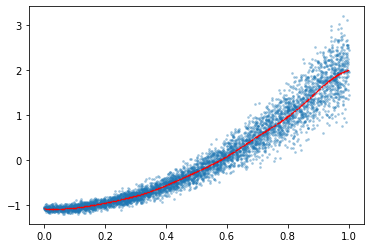

[-0.33810573 -1.02938578 -0.21796728 ... -0.82919938  0.19122756
 -0.18081513]


In [96]:

plt.scatter(x, y, s=3, alpha=0.3)

linear_reg= LinearRegression()
linear_reg.fit(design_mat_rad(x_train, 3, 0.2), y_train)
y_hat_a = linear_reg.predict(design_mat_rad(x_vali, 3, 0.2))
plt.plot(x_vali, y_hat_a, 'r.', markersize=0.5)
plt.show()




print(y_hat_a)

In [97]:
radical=[]
radical.append(index[21])
print(radical)

[[3, 0.2]]


In [160]:
rad_test=[]
skl_ta=skl_predict_new(design_mat_rad(x_train, 3,0.2), y_train, design_mat_rad(x_test, 3,0.2))
mse_testa=mse(skl_ta, y_test)
print(mse_testa)
rad_test.append(mse_testa)

0.04618464752905153


# polynomial dataset 2

In [67]:

max_deg=10
degrees=range(1, max_deg+1)
i=[]
for p in degrees:
    skl1=skl_predict_new(design_mat_pol(x1_train, p), y1_train, design_mat_pol(x1_vali, p))
   
    
    mse_vali=mse(skl1, y1_vali)
    i.append(mse_vali)
    min_2=np.argmin(i)
print(min_2)

5


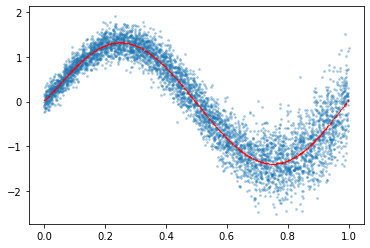

In [68]:
plt.scatter(x1, y1, s=3, alpha=0.3)

y_hat_2 = skl_predict_new(design_mat_pol(x1_train, 6), y1_train, design_mat_pol(x1_vali, 6))
plt.plot(x1_vali, y_hat_2, 'r.', markersize=0.5)
plt.show()

In [172]:

poly.append(min_2)
print(poly)

[1, 5]


In [127]:
pred_test = skl_predict_new(design_mat_pol(x_train, 6), y_train,design_mat_pol(x_test, 6))
mse_test2=mse(pred_test, y_test)
print(mse_test2)
poly_test.append(mse_test2)

0.046270105334907725


# radical dataset 2

In [98]:
rad_i=[]
index=[]

for p in range(1,11):
    
    for s in np.arange(0.1, 1.1, 0.1):
        index.append([p,s])
        sklb=skl_predict_new(design_mat_rad(x1_train, p,s), y1_train, design_mat_rad(x1_vali, p,s))
        mse_vali=mse(y1_vali, sklb )
        rad_i.append(mse_vali)
        
        min_radb=np.argmin(rad_i)
        
print(min_radb)
print(index[12])
    

12
[2, 0.30000000000000004]


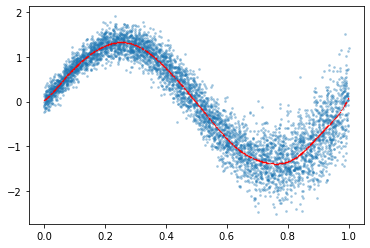

In [99]:
plt.scatter(x1, y1, s=3, alpha=0.3)

y_hatb=skl_predict_new(design_mat_rad(x1_train, 3,0.3), y1_train, design_mat_rad(x1_vali, 3,0.3))
plt.plot(x1_vali, y_hatb, 'r.', markersize=0.5)
plt.show()

In [137]:
radical.append(index[12])


In [161]:
skl_tb=skl_predict_new(design_mat_rad(x_train, 2,0.3), y_train, design_mat_rad(x_test, 2,0.3))
mse_testb=mse(skl_tb, y_test)
print(mse_testb)
rad_test.append(mse_testb)

0.046159094208308514


# polynomial dataset 3

In [70]:

max_deg=10
degrees=range(1, max_deg+1)
i=[]
for p in degrees:
    skl2=skl_predict_new(design_mat_pol(x2_train, p), y2_train, design_mat_pol(x2_vali, p))
   
    
    mse_vali=mse(skl2, y2_vali)
    i.append(mse_vali)
    min_3=np.argmin(i)
print(min_3)

9


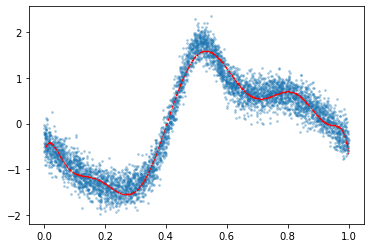

In [71]:
plt.scatter(x2, y2, s=3, alpha=0.3)

y_hat_3 = skl_predict_new(design_mat_pol(x2_train, 10), y2_train, design_mat_pol(x2_vali, 10))
plt.plot(x2_vali, y_hat_3, 'r.', markersize=0.5)
plt.show()

In [173]:
poly.append(min_3)
print(poly)

[1, 5, 9]


In [135]:
mse_rad=[]
pred_test = skl_predict_new(design_mat_pol(x_train, 10), y_train,design_mat_pol(x_test, 10))
mse_test3=mse(pred_test, y_test)
print(mse_test3)
mse_.append(mse_test3)


0.0461509840513108


# radical dataset 3

In [102]:
rad_i=[]
index=[]

for p in range(1,11):
    
    for s in np.arange(0.1, 1.1, 0.1):
        index.append([p,s])
        sklc=skl_predict_new(design_mat_rad(x2_train, p,s), y2_train, design_mat_rad(x2_vali, p,s))
        mse_vali=mse(y2_vali, sklc )
        rad_i.append(mse_vali)
        
        min_radc=np.argmin(rad_i)
        
print(min_radc)


71


In [103]:
print(index[71])

[8, 0.2]


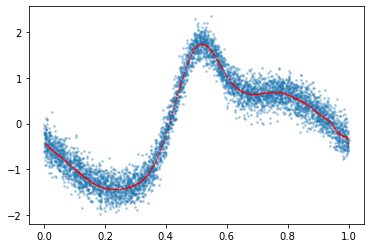

In [104]:
plt.scatter(x2, y2, s=3, alpha=0.3)

y_hatc=skl_predict_new(design_mat_rad(x2_train, 8,0.2), y2_train, design_mat_rad(x2_vali, 8,0.2))
plt.plot(x2_vali, y_hatc, 'r.', markersize=0.5)
plt.show()

In [139]:
radical.append(index[71])


In [162]:
skl_tc=skl_predict_new(design_mat_rad(x_train, 8,0.2), y_train, design_mat_rad(x_test, 8,0.2))
mse_testc=mse(skl_tc, y_test)
print(mse_testc)
rad_test.append(mse_testc)

0.04679116858075312


# polynomial dataset 4

In [73]:
max_deg=10
degrees=range(1, max_deg+1)
i=[]
for p in degrees:
    skl3=skl_predict_new(design_mat_pol(x3_train, p), y3_train, design_mat_pol(x3_vali, p))
   
    
    mse_vali=mse(skl3, y3_vali)
    i.append(mse_vali)
    min_4=np.argmin(i)
print(min_4)
print(i)

9
[0.265396150907754, 0.2661873453618804, 0.1519908335826432, 0.15199509275982784, 0.10735527372661996, 0.10735378037783684, 0.08682773499787509, 0.08682642651027629, 0.07413248446483238, 0.07410929911944164]


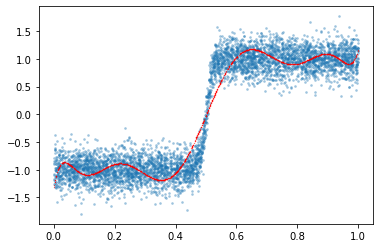

In [74]:
plt.scatter(x3, y3, s=3, alpha=0.3)

y_hat_4 = skl_predict_new(design_mat_pol(x3_train, 10), y3_train, design_mat_pol(x3_vali, 10))
plt.plot(x3_vali, y_hat_4, 'r.', markersize=0.5)
plt.show()

In [174]:
poly.append(min_4)
print(poly)

[1, 5, 9, 9]


In [129]:
pred_test = skl_predict_new(design_mat_pol(x_train, 10), y_train,design_mat_pol(x_test, 10))
mse_test4=mse(pred_test, y_test)
print(mse_test4)
poly_test.append(mse_test4)

0.0461509840513108


# radical dataset 4

In [107]:
rad_i=[]
index=[]

for p in range(1,11):
    
    for s in np.arange(0.1, 1.1, 0.1):
        index.append([p,s])
        skld=skl_predict_new(design_mat_rad(x3_train, p,s), y3_train, design_mat_rad(x3_vali, p,s))
        mse_vali=mse(y3_vali, skld )
        rad_i.append(mse_vali)
        
        min_radd=np.argmin(rad_i)
        
print(min_radd)



68


In [108]:
print(index[68])

[7, 0.9]


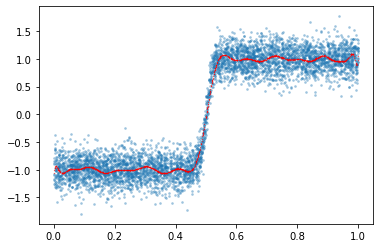

In [109]:
plt.scatter(x3, y3, s=3, alpha=0.3)

y_hatd=skl_predict_new(design_mat_rad(x3_train, 8,0.9), y3_train, design_mat_rad(x3_vali, 8,0.9))
plt.plot(x3_vali, y_hatd, 'r.', markersize=0.5)
plt.show()

In [180]:
radical.append(index[68])
radical=radical[0:4]
print(radical)

[[3, 0.2], [2, 0.30000000000000004], [8, 0.2], [7, 0.9]]


In [163]:
skl_tb=skl_predict_new(design_mat_rad(x_train, 7,0.9), y_train, design_mat_rad(x_test, 7,0.9))
mse_testb=mse(skl_tb, y_test)
print(mse_testb)
rad_test.append(mse_testb)

0.046689641920176043


In [164]:
rad_test

[0.04618464752905153,
 0.046159094208308514,
 0.04679116858075312,
 0.046689641920176043]

In [193]:
table['poly']=poly
table

,data,poly,radical
0,data_a,1,"[3, 0.2]"
1,data_b,5,"[2, 0.30000000000000004]"
2,data_c,9,"[8, 0.2]"
3,data_d,9,"[7, 0.9]"


In [182]:
table['radical']=radical
table
table.to_csv('/Users/yiqiuxia/Downloads/dataset 2/table')
#table for all the hypreparameters for all models

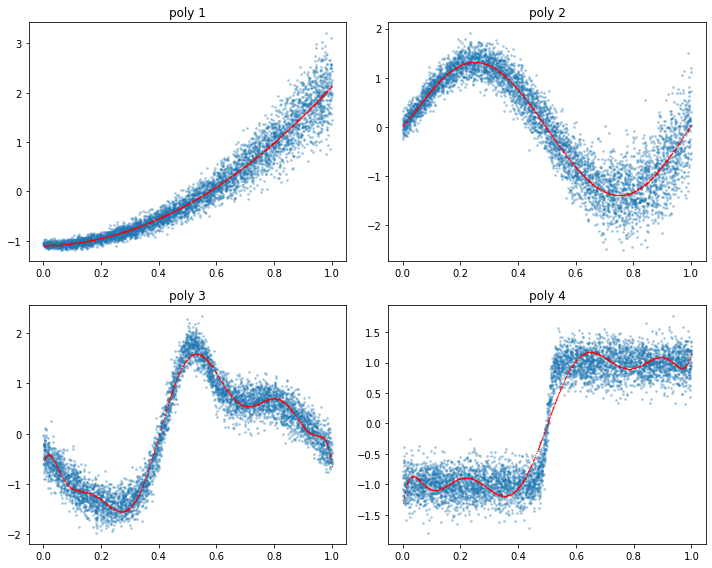

<Figure size 432x288 with 0 Axes>

In [196]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(x, y, s=3, alpha=0.3)
plt.plot(x_vali, y_hat_1, 'r.', markersize=0.5)
plt.title('poly 1')

plt.subplot(2, 2, 2)
plt.scatter(x1, y1, s=3, alpha=0.3)
plt.plot(x1_vali, y_hat_2, 'r.', markersize=0.5)
plt.title('poly 2')

plt.subplot(2, 2, 3)
plt.scatter(x2, y2, s=3, alpha=0.3)
plt.plot(x2_vali, y_hat_3, 'r.', markersize=0.5)
plt.title('poly 3')

plt.subplot(2, 2, 4)
plt.scatter(x3, y3, s=3, alpha=0.3)
plt.plot(x3_vali, y_hat_4, 'r.', markersize=0.5)
plt.title('poly 4')

plt.tight_layout()

plt.show()
plt.savefig('poly_4.png')
# grid plot for all polynomial  model performance

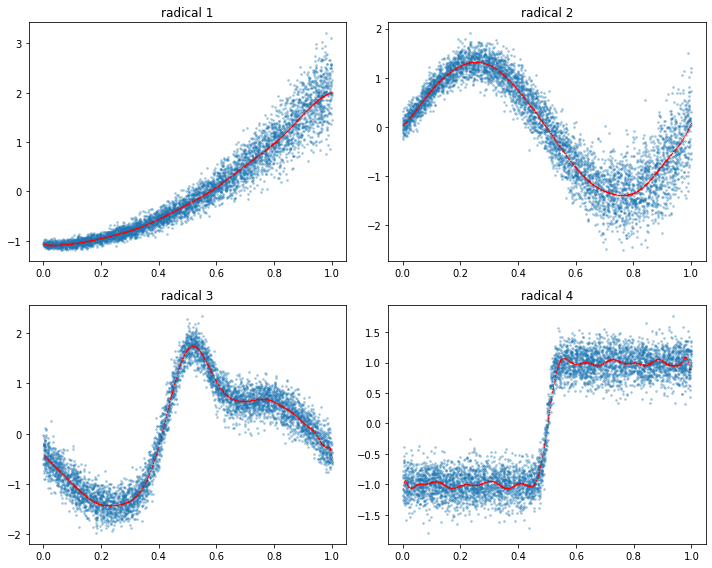

<Figure size 432x288 with 0 Axes>

In [198]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(x, y, s=3, alpha=0.3)
plt.plot(x_vali, y_hat_a, 'r.', markersize=0.5)
plt.title('radical 1')

plt.subplot(2, 2, 2)
plt.scatter(x1, y1, s=3, alpha=0.3)
plt.plot(x1_vali, y_hatb, 'r.', markersize=0.5)
plt.title('radical 2')

plt.subplot(2, 2, 3)
plt.scatter(x2, y2, s=3, alpha=0.3)
plt.plot(x2_vali, y_hatc, 'r.', markersize=0.5)
plt.title('radical 3')

plt.subplot(2, 2, 4)
plt.scatter(x3, y3, s=3, alpha=0.3)
plt.plot(x3_vali, y_hatd, 'r.', markersize=0.5)
plt.title('radical 4')

plt.tight_layout()

plt.show()
plt.savefig('radical_4.png')
# grid plot for all radical model performance

In [200]:
data_mse={'poly_test':poly_test,
         'rad_test': rad_test}
df_mse=pd.DataFrame(data_mse)
df_mse
df_mse.to_csv('/Users/yiqiuxia/Downloads/dataset 2/table')
# daraframe for the mse for all the model

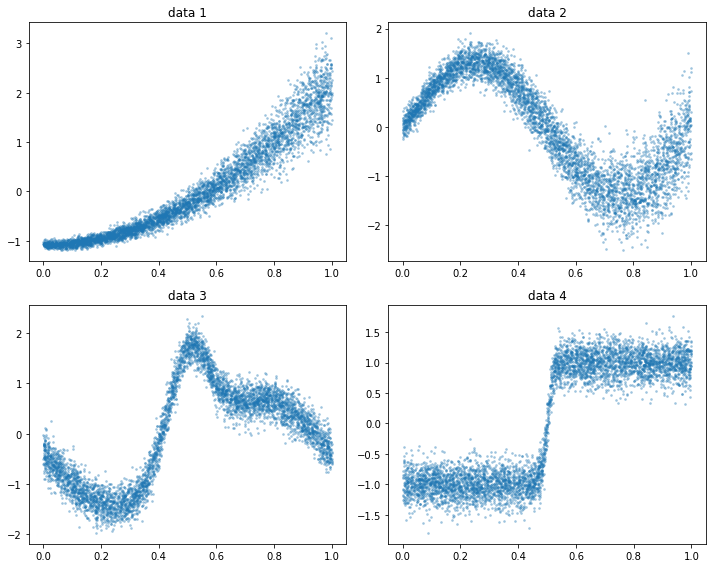

<Figure size 432x288 with 0 Axes>

In [201]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(x, y, s=3, alpha=0.3)

plt.title('data 1')

plt.subplot(2, 2, 2)
plt.scatter(x1, y1, s=3, alpha=0.3)

plt.title('data 2')

plt.subplot(2, 2, 3)
plt.scatter(x2, y2, s=3, alpha=0.3)

plt.title('data 3')

plt.subplot(2, 2, 4)
plt.scatter(x3, y3, s=3, alpha=0.3)

plt.title('data 4')

plt.tight_layout()

plt.show()
plt.savefig('data_4.png')